In [1]:
# Observation 1:Ramicane and Capomulin had considerably more mice tested than any other drug
# Ovservation 2:Infubinol and Ceftamin have a better success rate than Ramicane and Capomulin, 
#     the 0 tumor volume for Ramicane and Capomulin were outliers, but significant data for Infubinol and Ceftamin.
# Observation 3: For Capomulin, the larger the Tumor volume, the earlier the stage of treatment.  Basically the tumor volume
    #goes down as treatment progresses.



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np
import sklearn.datasets as dta

# Study data files
mouse_metadata = "./Resources/Mouse_metadata.csv"
study_results = "./Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
MouseStudy=pd.merge(mouse_metadata,study_results,how="inner",on="Mouse ID")
MouseStudy


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
TreatmentGroup=MouseStudy.groupby(["Drug Regimen"])

MeanReg=TreatmentGroup["Tumor Volume (mm3)"].mean().to_frame(name="Mean")
MedReg=TreatmentGroup["Tumor Volume (mm3)"].median().to_frame(name="Median")
VarReg=TreatmentGroup["Tumor Volume (mm3)"].var().to_frame(name="Variance")
StdDevReg=TreatmentGroup["Tumor Volume (mm3)"].std().to_frame(name="Standard Deviation")
SEMReg=TreatmentGroup["Tumor Volume (mm3)"].sem().to_frame(name="Standard Error")
Count=TreatmentGroup["Tumor Volume (mm3)"].count().to_frame(name="# of Data Points per Drug")

mult=[MeanReg, MedReg, VarReg, StdDevReg, SEMReg,Count]
SummaryT = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), mult)
SummaryT

,Mean,Median,Variance,Standard Deviation,Standard Error,# of Data Points per Drug
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,161
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


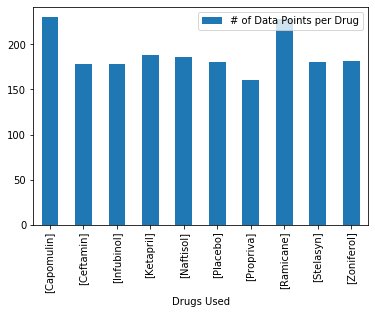

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Drugs=["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
DrugNames=TreatmentGroup["Drug Regimen"].unique().to_frame(name="Drugs Used")
Summary=pd.merge(SummaryT,DrugNames,how="outer",on="Drug Regimen")
Summary.plot.bar(x="Drugs Used",y="# of Data Points per Drug")

<BarContainer object of 10 artists>

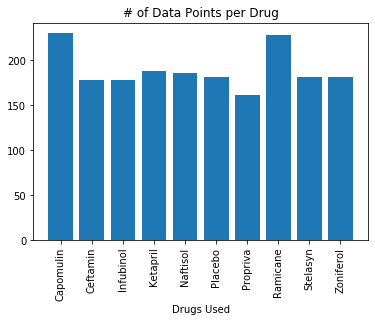

In [5]:
#Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.title("# of Data Points per Drug")
plt.xlabel("Drugs Used")
plt.xticks(rotation=90)
plt.bar(Drugs,Summary["# of Data Points per Drug"],)

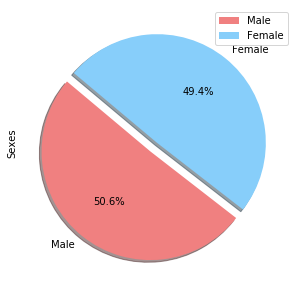

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Malem = MouseStudy.loc[MouseStudy["Sex"] == "Male"]
Femalem = MouseStudy.loc[MouseStudy["Sex"] == "Female"]
BM = Malem["Sex"].count()
GM = Femalem["Sex"].count()
Total=pd.DataFrame({"Sexes":[BM,GM]})
labels = ["Male", "Female"]
explode = (0.1, 0) 
colors = ["lightcoral", "lightskyblue"]
#MouseStudy['MaleCheck'] = np.where(MouseStudy['grade'] == "Male" ,1,0) 
#MouseStudy['FemaleCheck'] = np.where(MouseStudy['Sex'] == "Female" ,1,0) 
Total.plot.pie( y="Sexes",figsize=(5, 5),explode=explode,labels=labels , colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


([<matplotlib.patches.Wedge at 0x20bccba41c8>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

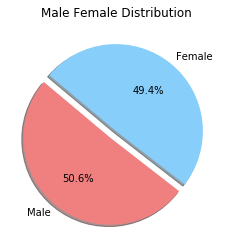

In [7]:
#Malem = (MouseStudy["Sex"].apply(lambda x: (x=="Male").count()))
#Femalem = (MouseStudy["Sex"].apply(lambda x: (x=="Female").count()))
Malem = MouseStudy.loc[MouseStudy["Sex"] == "Male"]
Femalem = MouseStudy.loc[MouseStudy["Sex"] == "Female"]
BM = Malem["Sex"].count()
GM = Femalem["Sex"].count()
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [BM, GM]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]
#plt.legend(BM, GM)
          
          
plt.title("Male Female Distribution")
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)    # Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Every time the timepoint is at 45, the final volume is recorded. check for 45.
MouseStudy['Final Volume'] = np.where(MouseStudy['Timepoint'] == 45 ,MouseStudy["Tumor Volume (mm3)"],0)

In [9]:
type(MouseStudy)

pandas.core.frame.DataFrame

In [10]:
Frame=pd.DataFrame(columns=["Capomulin","Ramicane","Infubinol","Ceftamin"])
print(Frame)
VolTotCap=[]
Capomulin = MouseStudy.loc[MouseStudy["Drug Regimen"] == "Capomulin"]
TotalVolCap=Capomulin.groupby(Capomulin["Mouse ID"])
SumVolCap=TotalVolCap["Final Volume"].sum()
quartiles1 = SumVolCap.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
for i in range(len(SumVolCap)):
    VolTotCap=SumVolCap[i]
    Frame = Frame.append({'Capomulin':VolTotCap},ignore_index=True)
VolTotRam=[]
Ramicane = MouseStudy.loc[MouseStudy["Drug Regimen"] == "Ramicane"]
TotalVolRam=Ramicane.groupby(Ramicane["Mouse ID"])
SumVolRam=TotalVolRam["Final Volume"].sum()
quartiles2 = SumVolRam.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
for j in range(len(SumVolRam)):
    VolTotRam=SumVolRam[j]
    Frame = Frame.append({'Ramicane':VolTotRam},ignore_index=True)
VolTotInfu=[]
Infubinol = MouseStudy.loc[MouseStudy["Drug Regimen"] == "Infubinol"]
TotalVolInfu=Infubinol.groupby(Infubinol["Mouse ID"])
SumVolInfu=TotalVolInfu["Final Volume"].sum()
quartiles3 = SumVolInfu.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
for k in range(len(SumVolInfu)):
    VolTotInfu=SumVolInfu[k]
    Frame = Frame.append({'Infubinol':VolTotInfu},ignore_index=True)
VolTotCef=[]
Ceftamin = MouseStudy.loc[MouseStudy["Drug Regimen"] == "Ceftamin"]
TotalVolCef=Ceftamin.groupby(Ceftamin["Mouse ID"])
SumVolCef=TotalVolCef["Final Volume"].sum()
quartiles4 = SumVolCef.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
for m in range(len(SumVolInfu)):
    VolTotCef=SumVolCef[m]
    Frame = Frame.append({'Ceftamin':VolTotCef},ignore_index=True)
Frame    
    #Capomulin, Ramicane,  Infubinol, and Ceftamin

Empty DataFrame
Columns: [Capomulin, Ramicane, Infubinol, Ceftamin]
Index: []


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,0.000000,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,NaN,NaN,0.000000
96,NaN,NaN,NaN,64.634949
97,NaN,NaN,NaN,61.386660
98,NaN,NaN,NaN,68.594745


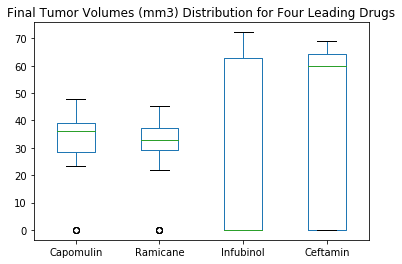

In [11]:


Frame.dropna()

Frame.plot.box(title="Final Tumor Volumes (mm3) Distribution for Four Leading Drugs")

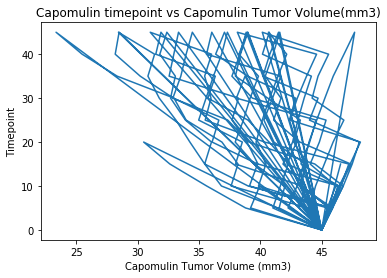

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Cap = MouseStudy.loc[MouseStudy["Drug Regimen"] == "Capomulin"]
plt.title("Capomulin timepoint vs Capomulin Tumor Volume(mm3)")
plt.xlabel("Capomulin Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.plot(Cap["Tumor Volume (mm3)"],Cap["Timepoint"])
cnt=Cap["Drug Regimen"].count()



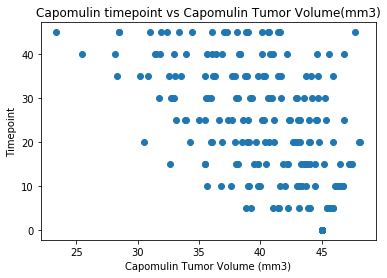

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.title("Capomulin timepoint vs Capomulin Tumor Volume(mm3)")
plt.xlabel("Capomulin Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.scatter(Cap["Tumor Volume (mm3)"],Cap["Timepoint"])

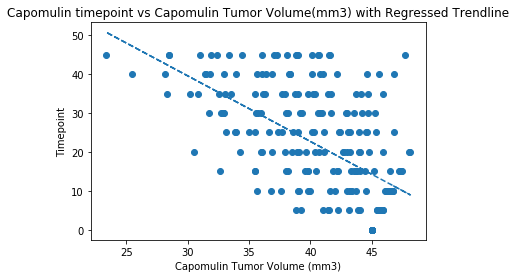

-0.58


In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

CorrCoef=round(st.pearsonr(Cap["Tumor Volume (mm3)"],Cap["Timepoint"])[0],2)
slope, Yint, r, p, std_err = st.linregress(Cap["Tumor Volume (mm3)"],Cap["Timepoint"])    
fit = slope * Cap["Tumor Volume (mm3)"] + Yint    # Plot the linear model on top of scatter plot 

plt.scatter(Cap["Tumor Volume (mm3)"],Cap["Timepoint"])
plt.plot(Cap["Tumor Volume (mm3)"],fit,"--")
#plt.xticks(year, rotation=90)
plt.title("Capomulin timepoint vs Capomulin Tumor Volume(mm3) with Regressed Trendline")

plt.xlabel('Capomulin Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.show()
print(CorrCoef)
